In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
file = "wine.csv"
file_df = pd.read_csv(file)
file_df.head()

,id,country,description,points,price,state,region,name,variety,winery
0,1,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
1,2,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
2,3,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
3,4,US,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,Napa Valley,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
4,5,US,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,Alexander Valley,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini


In [9]:
file_df.describe()

,id,points,price
count,54504.000000,54504.00000,54265.000000
mean,27252.500000,88.56372,36.573464
std,15734.093873,3.11484,27.088857
min,1.000000,80.00000,4.000000
25%,13626.750000,86.00000,20.000000
50%,27252.500000,88.00000,30.000000
75%,40878.250000,91.00000,45.000000
max,54504.000000,100.00000,2013.000000


In [157]:
# Totals

num_wines = file_df['name'].nunique()
num_wineries = file_df['winery'].nunique()
num_regions = file_df['region'].nunique()

print(f"There are {num_wines} wines in the U.S.")
print(f"There are {num_wineries} wineries in the U.S.")
print(f"There are {num_regions} regions in the U.S.")

There are 50229 wines in the U.S.
There are 5375 wineries in the U.S.
There are 264 regions in the U.S.


## Top Wineries Based on highest average points on all their wines

In [62]:
# Create a group based on winery name
wineries = file_df.groupby('winery')

# Count how many times a wine name appears in the winery group
num_wines = wineries['name'].count()

# Add up the number of points the wines in each winery received
wine_points = wineries['points'].sum()

# Merge the two dataframes together to get our data points needed for the average calculation
new_df = pd.merge(num_wines, wine_points, on="winery")

# Calculate average points per winery
new_df['average_points'] = new_df['points']/new_df['name']

new_df = new_df.rename(columns = {'name': 'wines'})

new_df.head()

,wines,points,average_points
winery,,,
10 Knots,4,333,83.250000
100 Percent Wine,3,259,86.333333
1000 Stories,2,181,90.500000
1070 Green,1,88,88.000000
10Span,4,334,83.500000


In [64]:
# Remove the sum points column

wineries_df = new_df[['wines', 'average_points']]
wineries_df.head()

,wines,average_points
winery,,
10 Knots,4,83.250000
100 Percent Wine,3,86.333333
1000 Stories,2,90.500000
1070 Green,1,88.000000
10Span,4,83.500000


In [97]:
 # Create pandas dataframe to sort the average points in descending order so we can get the top

# Finalize the top wineries if more than 95 average points with 5 or more wines
top_wineries_df = wineries_df[(wineries_df.average_points>94) & (wineries_df.wines>2)]

top_wineries_df

,wines,average_points
winery,,
Arkenstone,3,95.333333
Cardinale,5,96.000000
Colgin,4,96.000000
Devil Proof,3,94.333333
Dolce,4,95.500000
Harlan Estate,5,95.000000
Horsepower,11,95.090909
Macauley,8,94.250000
Montagna,3,94.666667


In [98]:
# Create dataset for chart
wineries_and_average = top_wineries_df[['average_points']].sort_values(by=['average_points'])
wineries_and_average

,average_points
winery,
Paul Hobbs,94.043478
Macauley,94.250000
Quilceda Creek,94.300000
Devil Proof,94.333333
Redmon,94.333333
Montagna,94.666667
Verité,94.888889
Harlan Estate,95.000000
Horsepower,95.090909


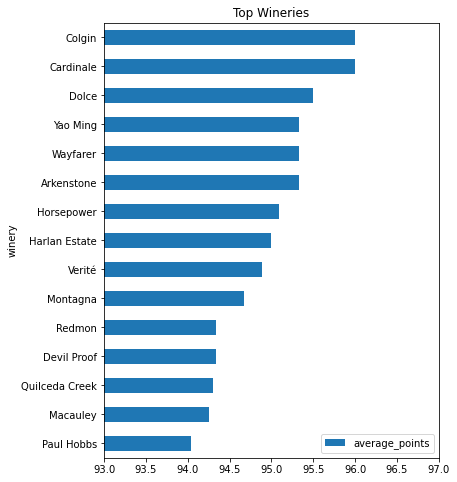

In [105]:
# Use DataFrame.plot() in order to create a bar chart of the data
wineries_and_average.plot(kind="barh", figsize=(6,8), xlim=(93,97))

# Set a title for the chart
plt.title("Top Wineries")

plt.show()

## Wines based on filters *****

In [ ]:
file_df.head()

In [133]:
# Restructure the dataframe for wines focus
wines_df = file_df[['name', 'variety', 'winery', 'region', 'state', 'price', 'points', 'description']]
wines_df.head()

,name,variety,winery,region,state,price,points,description
0,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Willamette Valley,Oregon,14.0,87,"Tart and snappy, the flavors of lime flesh and..."
1,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Lake Michigan Shore,Michigan,13.0,87,"Pineapple rind, lemon pith and orange blossom ..."
2,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Willamette Valley,Oregon,65.0,87,"Much like the regular bottling from 2012, this..."
3,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,Napa Valley,California,19.0,87,"Soft, supple plum envelopes an oaky structure ..."
4,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,Alexander Valley,California,34.0,87,"Slightly reduced, this wine offers a chalky, t..."


In [159]:
# Create variables to hold the filters of the wine dataset for flavor, variety, region, state, points, and price

# ****************************still need to figure out how to filter data and ignore a variable if it's blank to include all

flavor = 'tart'
variety = 'Pinot Noir'
region = 'Willamette Valley'
state = 'Oregon'
points_min = 80
price_min = 10
price_max = 50

# Filter the dataset based on filters applied

filtered_wines_df = wines_df[(wines_df['description'].str.contains(flavor)) & (wines_df['variety'] == variety)
                            & (wines_df['region'] == region) & (wines_df['state'] == state)
                            & (wines_df['points']>=points_min) & (wines_df['price']>=price_min)
                            & (wines_df['price']<=price_max)]

filtered_wines_df.head()

,name,variety,winery,region,state,price,points,description
91,Silvan Ridge 2006 Reserve Pinot Noir (Willamet...,Pinot Noir,Silvan Ridge,Willamette Valley,Oregon,28.0,85,"There is an odd, piercing edge to the aromas, ..."
99,Amity 2006 Estate Single Vineyard Pinot Noir (...,Pinot Noir,Amity,Willamette Valley,Oregon,45.0,85,This seems as if it was assembled from lesser ...
106,Willamette Valley Vineyards 2009 Estate Pinot ...,Pinot Noir,Willamette Valley Vineyards,Willamette Valley,Oregon,40.0,89,"Young, tart and wrapped up tight as a drum, th..."
199,Le Cadeau 2015 Équinoxe Pinot Noir (Willamette...,Pinot Noir,Le Cadeau,Willamette Valley,Oregon,50.0,91,"Slightly liquorous when first opened, this pus..."
318,Patton Valley 2010 West Block Pinot Noir (Will...,Pinot Noir,Patton Valley,Willamette Valley,Oregon,48.0,92,All the 2010 Patton Valley Pinots are signific...


In [169]:
filtered_wines_df = filtered_wines_df.sort_values(by='points', ascending = False)

filtered_wines_df = filtered_wines_df.head(25)

filtered_wines_df

,name,variety,winery,region,state,price,points,description
44695,Ken Wright 2010 Freedom Hill Vineyard Pinot No...,Pinot Noir,Ken Wright,Willamette Valley,Oregon,50.0,94,"A marvelous vintage for Freedom Hill, this hig..."
21512,Brittan Vineyards 2012 Basalt Block Pinot Noir...,Pinot Noir,Brittan Vineyards,Willamette Valley,Oregon,48.0,93,The aromatics immediately capture your attenti...
37448,Big Table Farm 2013 Sunnyside Vineyard Pinot N...,Pinot Noir,Big Table Farm,Willamette Valley,Oregon,48.0,93,Among a fascinating array of low-alcohol Pinot...
19316,Patricia Green Cellars 2015 Freedom Hill Viney...,Pinot Noir,Patricia Green Cellars,Willamette Valley,Oregon,48.0,93,This was half whole cluster-fermented and neat...
43563,Ponzi 2015 Tavola Pinot Noir (Willamette Valley),Pinot Noir,Ponzi,Willamette Valley,Oregon,27.0,92,"Stunningly good for an entry-level Pinot Noir,..."
49339,Big Table Farm 2015 Pinot Noir (Willamette Val...,Pinot Noir,Big Table Farm,Willamette Valley,Oregon,42.0,92,"Outgoing and easy to like, this brings tart an..."
21132,Aberrant Cellars 2015 Philtrum Blanc Pinot Noi...,Pinot Noir,Aberrant Cellars,Willamette Valley,Oregon,34.0,92,This intriguing category—white wine made from ...
318,Patton Valley 2010 West Block Pinot Noir (Will...,Pinot Noir,Patton Valley,Willamette Valley,Oregon,48.0,92,All the 2010 Patton Valley Pinots are signific...
51914,Left Coast Cellars 2014 Latitude 45° Estate Gr...,Pinot Noir,Left Coast Cellars,Willamette Valley,Oregon,38.0,92,"All Dijon clone, this is a tightly wound, subs..."
53006,Willamette Valley Vineyards 2008 South Block P...,Pinot Noir,Willamette Valley Vineyards,Willamette Valley,Oregon,45.0,92,"Pretty and complex, this delivers a mélange of..."


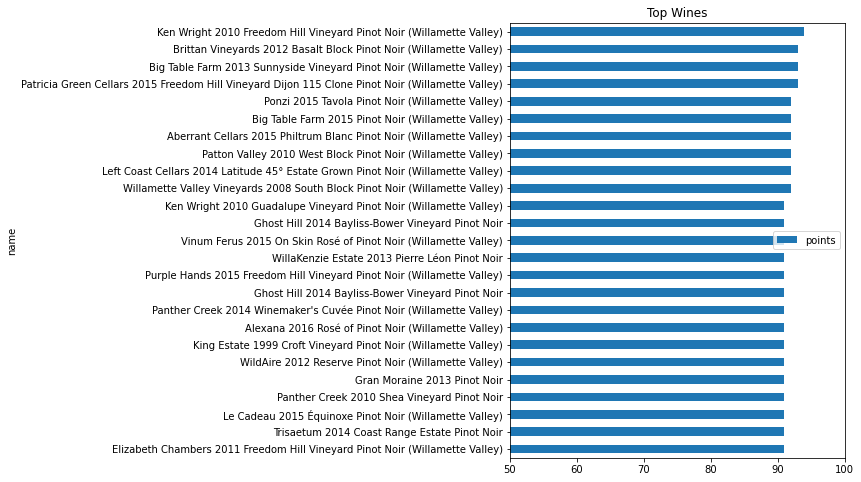

<Figure size 432x288 with 0 Axes>

In [170]:
filtered_wines_points = filtered_wines_df[['name', 'points']].sort_values(by=['points'])

filtered_wines_points = filtered_wines_points.set_index("name")

# Use DataFrame.plot() in order to create a bar chart of the data
filtered_wines_points.plot(kind="barh", figsize=(6,8), xlim=(50,100))

# Set a title for the chart
plt.title("Top Wines")

plt.show()
plt.tight_layout()

## Top Wineres sorted by Price

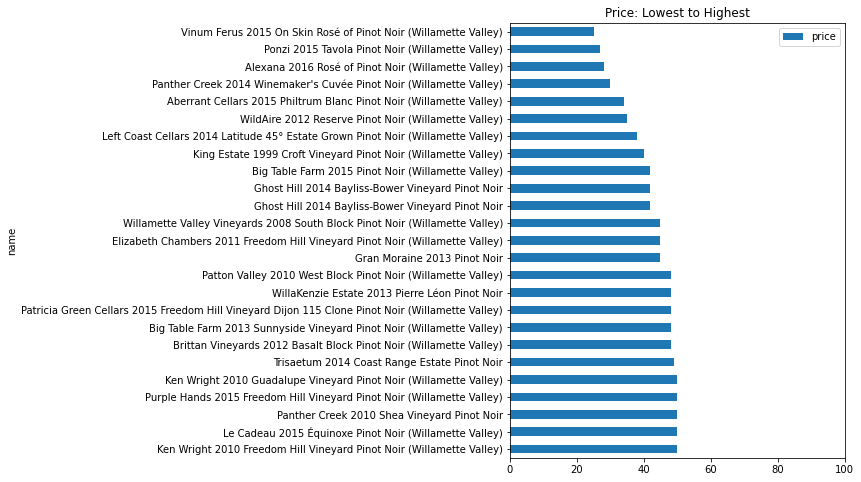

<Figure size 432x288 with 0 Axes>

In [171]:
filtered_wines_price = filtered_wines_df[['name', 'price']].sort_values(by=['price'], ascending=False)

filtered_wines_price = filtered_wines_price.set_index("name")

# Use DataFrame.plot() in order to create a bar chart of the data
filtered_wines_price.plot(kind="barh", figsize=(6,8), xlim=(0,100))

# Set a title for the chart
plt.title("Price: Lowest to Highest")

plt.show()
plt.tight_layout()

## Pie Chart for Variety included in the top wines

In [172]:
# Create a group based on winery name

filtered_wines_variety = filtered_wines_df.groupby('variety')

count_varieties = filtered_wines_variety['variety'].count()

count_varieties

variety
Pinot Noir    25
Name: variety, dtype: int64

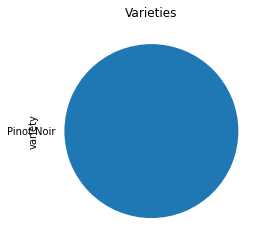

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

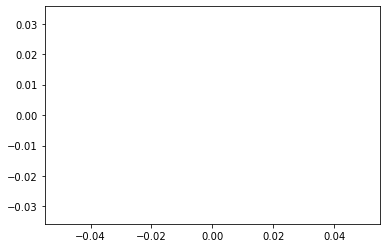

In [173]:
variety_pie = count_varieties.plot(kind="pie", title="Varieties")

plt.show()
plt.axis("equal")

## Bar Chart showing which wineries they fall in

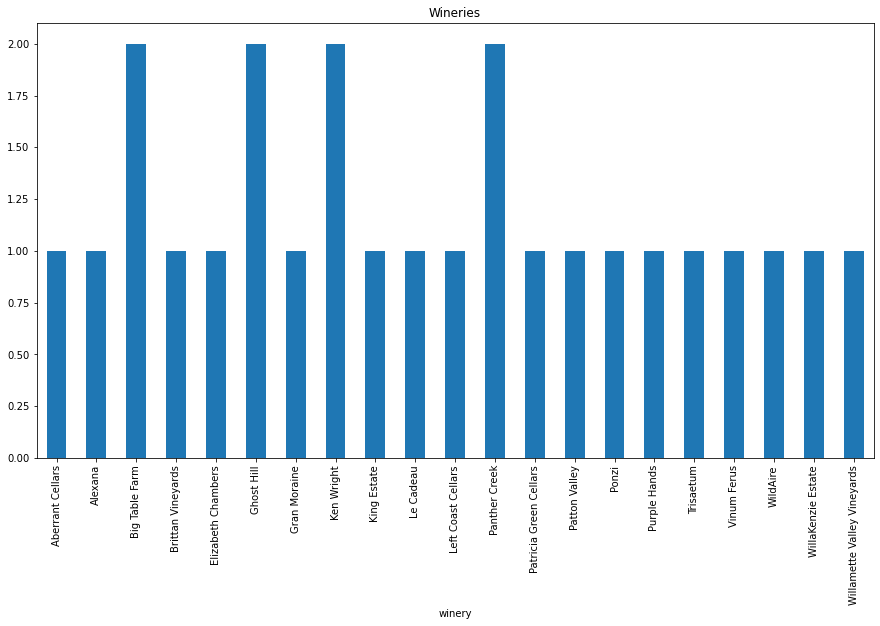

<Figure size 432x288 with 0 Axes>

In [174]:
filtered_wines_wineries = filtered_wines_df.groupby('winery')

count_in_wineries = filtered_wines_wineries['winery'].count()

# Use DataFrame.plot() in order to create a bar chart of the data
count_in_wineries.plot(kind="bar", figsize=(15,8))

# Set a title for the chart
plt.title("Wineries")

plt.show()
plt.tight_layout()

## Bar Chart showing which regions they fall in

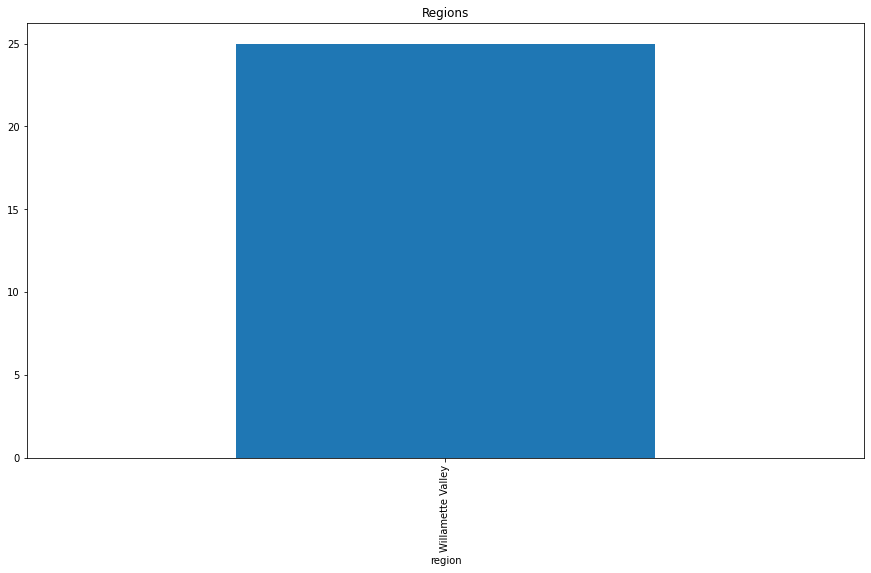

<Figure size 432x288 with 0 Axes>

In [175]:
filtered_wines_regions = filtered_wines_df.groupby('region')

count_in_regions = filtered_wines_regions['region'].count()

# Use DataFrame.plot() in order to create a bar chart of the data
count_in_regions.plot(kind="bar", figsize=(15,8))

# Set a title for the chart
plt.title("Regions")

plt.show()
plt.tight_layout()

## Bar Chart showing which states they fall in

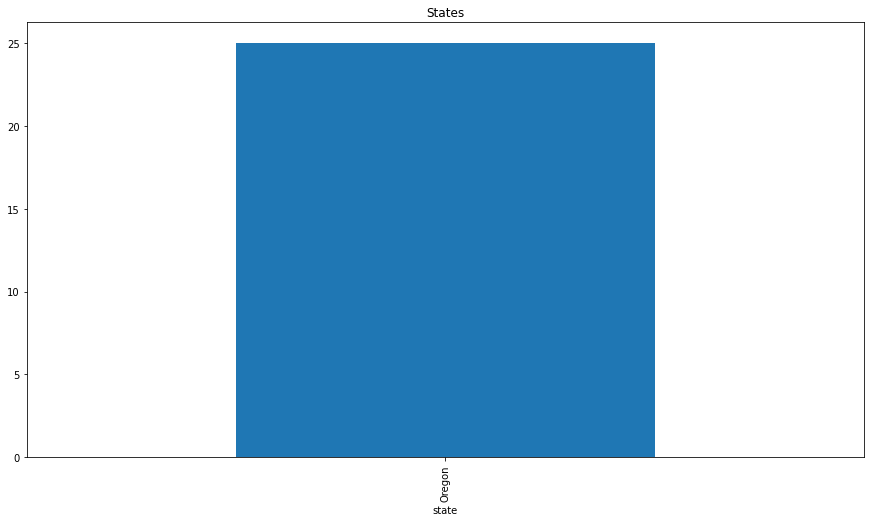

<Figure size 432x288 with 0 Axes>

In [176]:
filtered_wines_states = filtered_wines_df.groupby('state')

count_in_states = filtered_wines_states['state'].count()

# Use DataFrame.plot() in order to create a bar chart of the data
count_in_states.plot(kind="bar", figsize=(15,8))

# Set a title for the chart
plt.title("States")

plt.show()
plt.tight_layout()